In [ ]:
# Google Driveをマウント
from google.colab import userdata, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Fitbit

/content/drive/MyDrive/Fitbit


In [ ]:
#!pip install fitbit
!git clone https://github.com/Sunwood-ai-labs/python-fitbit.git

fatal: destination path 'python-fitbit' already exists and is not an empty directory.


In [ ]:
import sys
import os
sys.path.append('/content/drive/MyDrive/Fitbit/python-fitbit')

import json
from google.colab import userdata, drive
import fitbit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np



In [ ]:
# Fitbit APIの認証情報を取得
CLIENT_ID = userdata.get('FITBIT_CLIENT_ID')
CLIENT_SECRET = userdata.get('FITBIT_CLIENT_SECRET')
TOKEN_FILE = "token.json"

# トークンファイルを読み込み
with open(TOKEN_FILE) as f:
    TOKEN_DICT = json.load(f)

ACCESS_TOKEN = TOKEN_DICT['access_token']
REFRESH_TOKEN = TOKEN_DICT['refresh_token']

# トークンを更新する関数
def update_token(token):
    with open(TOKEN_FILE, 'w') as f:
        json.dump(token, f)

# Fitbitクライアントを初期化
client = fitbit.Fitbit(
    CLIENT_ID,
    CLIENT_SECRET,
    access_token=ACCESS_TOKEN,
    refresh_token=REFRESH_TOKEN,
    refresh_cb=update_token
)

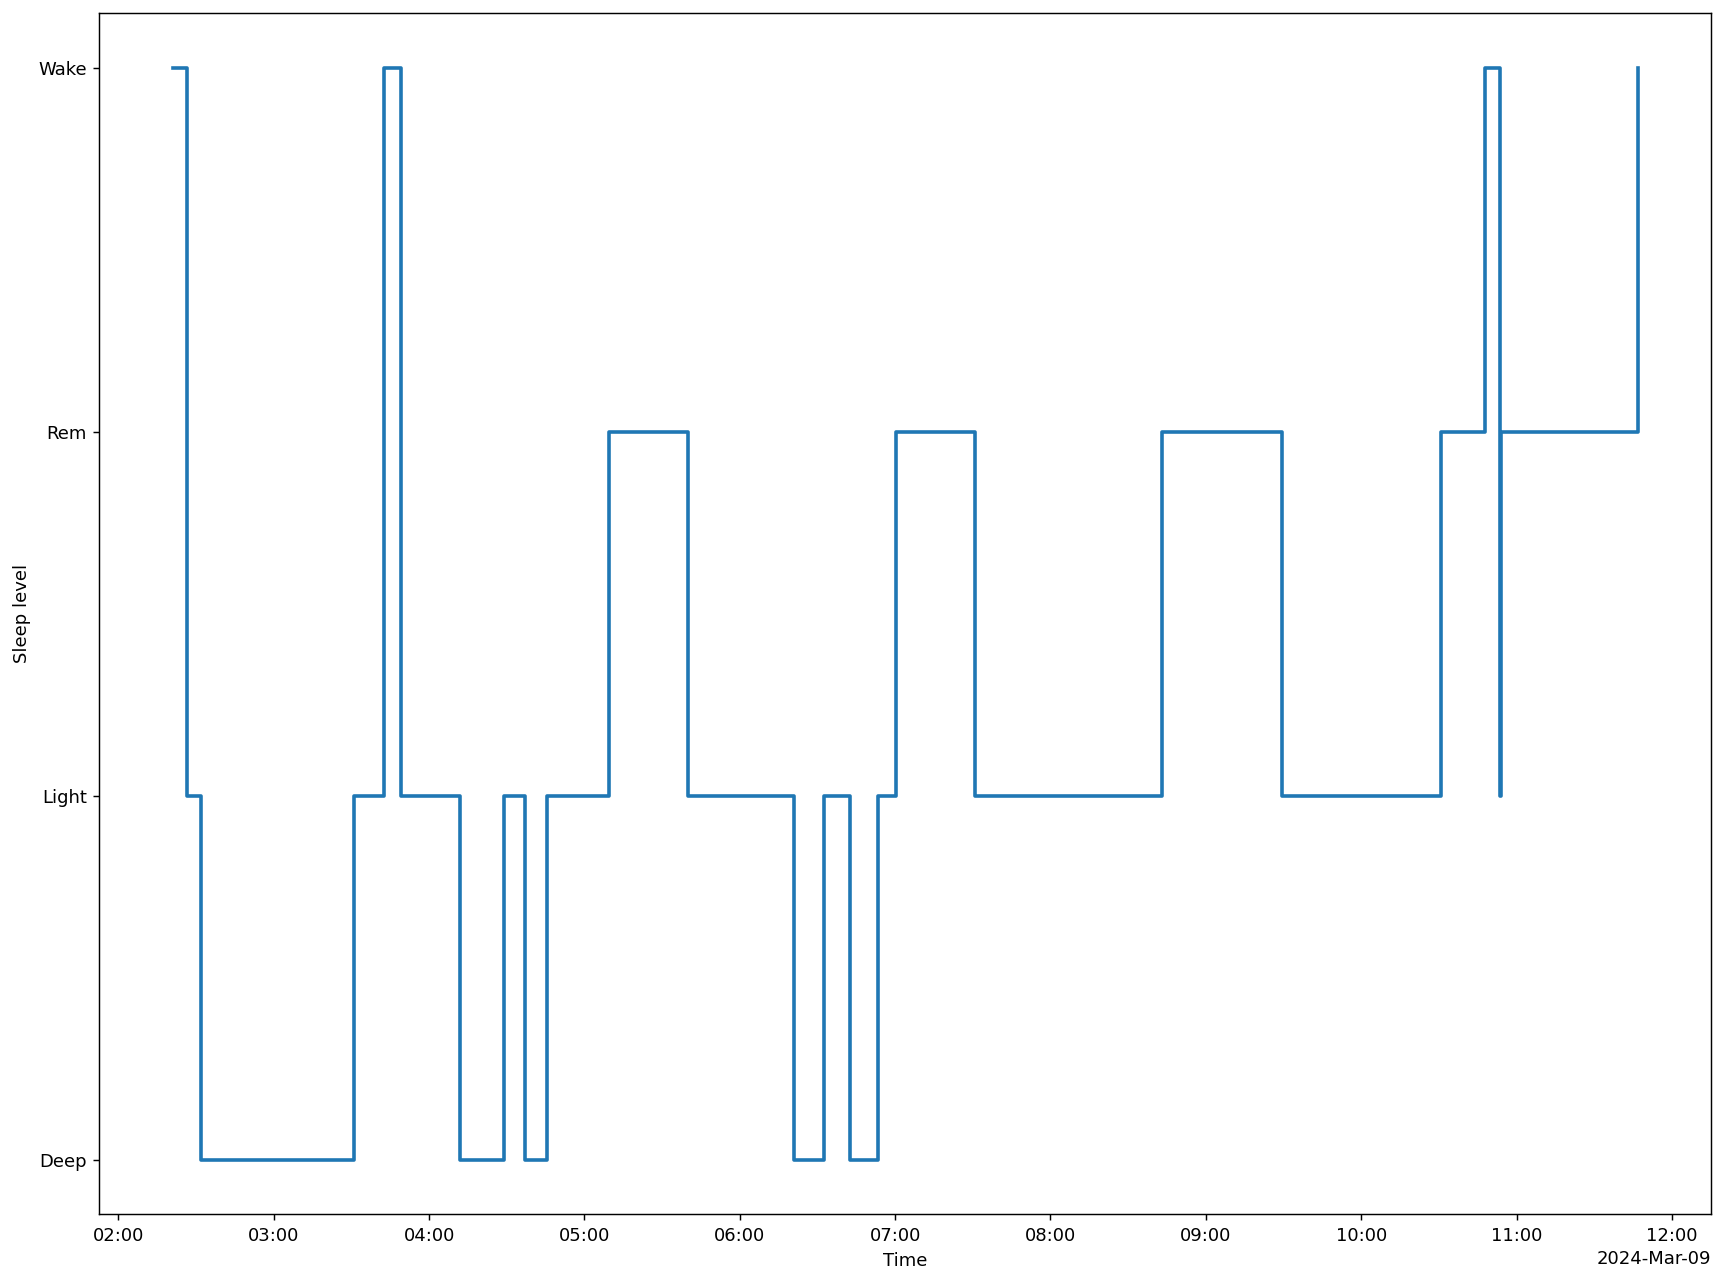

In [ ]:
# 睡眠データを取得
DATE = "2024-03-09"
data_sleep = client.sleep(DATE)

# 詳細な睡眠データを取得
data_sleep_levels = data_sleep["sleep"][0]["levels"]["data"]
df_sleep_levels = pd.DataFrame.from_dict(data_sleep_levels)
df_sleep_levels.index = pd.to_datetime(df_sleep_levels["dateTime"])

# 睡眠レベルを数値に変換
sleep_level_map = {"wake": 3, "rem": 2, "light": 1, "deep": 0}
df_sleep_levels["level_int"] = df_sleep_levels["level"].map(sleep_level_map)

# 睡眠データをプロット
fig, ax = plt.subplots(figsize=(16, 12), dpi=130)
ax.step(df_sleep_levels.index, df_sleep_levels["level_int"], "-", where="post", lw=2)

# 軸の設定
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_yticks(range(4))
ax.set_yticklabels(["Deep", "Light", "Rem", "Wake"])
ax.set_xlabel("Time")
ax.set_ylabel("Sleep level")

# グラフを保存して表示
# plt.tight_layout()
plt.savefig("sleep_analysis.png")
plt.show()